# Landmark Classifier

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo’s location can often be obtained by looking at the photo’s metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo’s metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernible landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

This notebook classifies 50 landmarks by building models to automatically predict the location of the image based on any landmarks depicted in the image.

### Table of Content

In [1]:
# import all the packages
import re
import PIL.Image

import torch
from utils.models.models import train, predict_image, get_data_loader, train_fastai
from utils.preprocess import preprocess
from utils.visualize import visualize

import warnings
warnings.filterwarnings('ignore')

						Classes & Indexes
0:	Haleakala National Park
1:	Mount Rainier National Park
2:	Ljubljana Castle


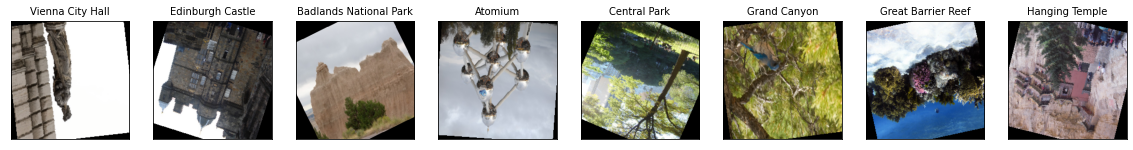

In [2]:
# define the batch size
BATCH_SIZE = 8

# get the loaders
loaders, dictionary = preprocess.pytorch_loaders(n_batch=BATCH_SIZE)

# show first three instances
dictionary.simple_print(3)

# visualize a batch
visualize.visualize(dictionary, loaders['train'], single=False)

# PyTorch

## How to train a model

There are three models available: vgg16, resnet18, and resnet34 which can be easily used. There's an option to select the optimizer (SGD, Adam, Adagrad) that take advantage of Nesterov (SGD), Momentum (SGD), and Amsgrad (Adam). Each model also implements the ExponentialLR schedulers.

Validation loss decreased (inf --> 3.913316).  Saving model ...
Validation loss decreased (3.913316 --> 3.829247).  Saving model ...
Validation loss decreased (3.829247 --> 3.525030).  Saving model ...
Epoch: 5 	Training Loss: 3.372790 	Validation Loss: 3.236617
Validation loss decreased (3.525030 --> 3.236617).  Saving model ...
Validation loss decreased (3.236617 --> 3.236302).  Saving model ...
Validation loss decreased (3.236302 --> 2.874689).  Saving model ...
Epoch: 10 	Training Loss: 2.688255 	Validation Loss: 2.735424
Validation loss decreased (2.874689 --> 2.735424).  Saving model ...
Validation loss decreased (2.735424 --> 2.486279).  Saving model ...
Validation loss decreased (2.486279 --> 2.444451).  Saving model ...
Validation loss decreased (2.444451 --> 2.376133).  Saving model ...
Validation loss decreased (2.376133 --> 2.355964).  Saving model ...
Epoch: 15 	Training Loss: 2.089425 	Validation Loss: 2.204860
Validation loss decreased (2.355964 --> 2.204860).  Saving mo

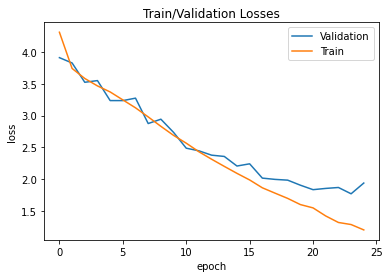

Test Loss: 1.745527


Test accuracy: 58% (732/1250)
========== Ending Training ==========
        Train loss: 1.1977224512262508
        Valid loss: 1.936675887107849
        Test  loss: 1.7455271508874772
        
CPU times: total: 1h 8min 51s
Wall time: 47min 39s


In [11]:
%%time
# get cuda availability
cuda = torch.cuda.is_available()

# train model
train(path='data', model_name='resnet34', mode='pytorch', epochs=25, save_name='test')

## Classify a single image

There are 12 images you can select from. All of them are stored in "images" folder. For convenience, copy one of the following:
##### Haleakala National Park
- 'images/00.Haleakala_National_Park/4afe43071f86a516.jpg'
- 'images/00.Haleakala_National_Park/075f8953165e9f08.jpg'
- 'images/00.Haleakala_National_Park/1346daf97c85522d.jpg'

##### Niagara Falls
- 'images/06.Niagara_Falls/2bf44601a8a364cb.jpg' <br>
- 'images/06.Niagara_Falls/3aa4d40bfc2f93f9.jpg' <br>
- 'images/06.Niagara_Falls/4b83cb0361a0112e.jpg' <br>

##### Vienna City Hall
- 'images/19.Vienna_City_Hall/2bf44601a8a364cb.jpg' <br>
- 'images/19.Vienna_City_Hall/3aa4d40bfc2f93f9.jpg' <br>
- 'images/19.Vienna_City_Hall/4b83cb0361a0112e.jpg' <br>

##### Brooklyn Bridge
- 'images/30.Brooklyn_Bridge/4bdf22a38ccc66c0.jpg' <br>
- 'images/30.Brooklyn_Bridge/11a81fe38b0333ca.jpg' <br>
- 'images/30.Brooklyn_Bridge/26421bec5cb3e3bf.jpg' <br>

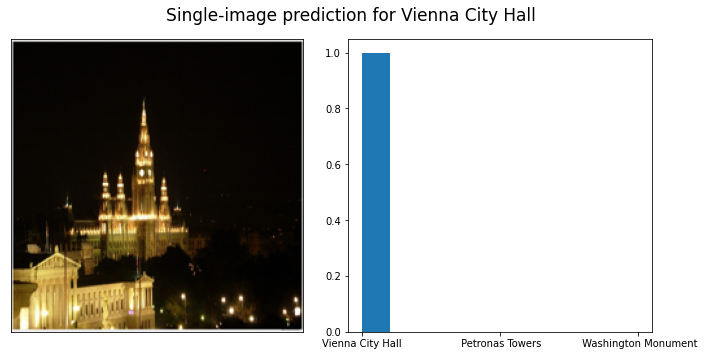

In [6]:
path = 'images/19.Vienna_City_Hall/33fdae363340e364.jpg'

# open image
img = PIL.Image.open(path)

# get cleaned title
title = path.split('/')[1].replace('_', ' ')
title = ' '.join(re.findall('[A-Za-z]+', title))

# predict image
predict_image(img, title, model_name='resnet34')

## FastAI

In [2]:
from fastbook import *
import fastai

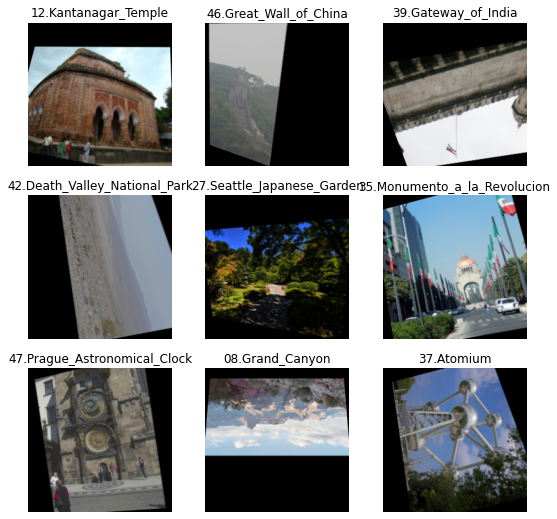

In [3]:
dls = get_data_loader(path='output')

dls.train.show_batch()


  ===== Start training =====
  Epochs: 25
  Model: resnet34
  Freeze epochs: 3
  Batch size: 16
  


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,4.373131,2.670221,0.346000,0.307297,02:19
1,3.011970,1.870425,0.537000,0.522256,02:04
2,2.559825,1.653427,0.582000,0.573762,02:04


Better model found at epoch 0 with f1_score value: 0.3072966752824859.


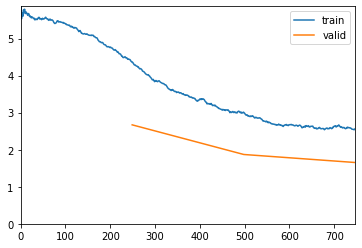

Better model found at epoch 1 with f1_score value: 0.5222556748034355.
Better model found at epoch 2 with f1_score value: 0.5737623232856357.


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,1.891168,1.323908,0.655000,0.647351,02:18
1,1.700037,1.204634,0.697000,0.697682,02:23
2,1.596408,1.132657,0.699000,0.691615,02:19
3,1.532277,1.177375,0.705000,0.699977,02:11
4,1.391511,1.132149,0.704000,0.700506,02:12
5,1.354203,1.238035,0.685000,0.684869,02:12
6,1.337488,1.100258,0.709000,0.708999,02:29
7,1.250849,1.199985,0.708000,0.710385,02:25
8,1.111479,1.123839,0.730000,0.736347,02:23
9,0.997144,1.195069,0.730000,0.735788,02:22


Better model found at epoch 0 with f1_score value: 0.6473511668744055.


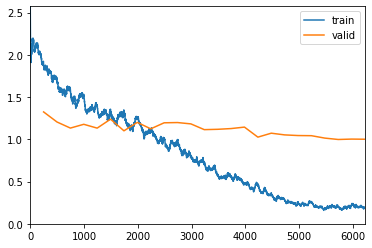

Better model found at epoch 1 with f1_score value: 0.6976817291158658.
Better model found at epoch 3 with f1_score value: 0.6999771353100475.
Better model found at epoch 4 with f1_score value: 0.7005061554621139.
Better model found at epoch 6 with f1_score value: 0.7089992989971275.
Better model found at epoch 7 with f1_score value: 0.710384717508032.
Better model found at epoch 8 with f1_score value: 0.7363466658560689.
Better model found at epoch 12 with f1_score value: 0.7493166291747713.
Better model found at epoch 14 with f1_score value: 0.7559915345440532.
Better model found at epoch 16 with f1_score value: 0.7739669234535843.
Better model found at epoch 18 with f1_score value: 0.786082766432573.
Better model found at epoch 21 with f1_score value: 0.7899156905805503.
Better model found at epoch 22 with f1_score value: 0.792082131563479.
Better model found at epoch 23 with f1_score value: 0.7929895971503096.
Better model found at epoch 24 with f1_score value: 0.7951036663461052.


                                     precision    recall  f1-score   support

         00.Haleakala_National_Park       0.68      0.65      0.67        20
     01.Mount_Rainier_National_Park       0.71      0.50      0.59        20
                02.Ljubljana_Castle       0.76      0.80      0.78        20
                        03.Dead_Sea       0.44      0.35      0.39        20
                04.Wroclaws_Dwarves       0.82      0.90      0.86        20
          05.London_Olympic_Stadium       0.76      0.95      0.84        20
                   06.Niagara_Falls       0.76      0.80      0.78        20
                      07.Stonehenge       0.94      0.85      0.89        20
                    08.Grand_Canyon       0.89      0.80      0.84        20
              09.Golden_Gate_Bridge       0.89      0.85      0.87        20
                10.Edinburgh_Castle       0.65      0.85      0.74        20
11.Mount_Rushmore_National_Memorial       0.93      0.65      0.76        2

                                                            confused
0        (01.Mount_Rainier_National_Park, 25.Banff_National_Park, 5)
1                    (03.Dead_Sea, 42.Death_Valley_National_Park, 5)
2     (00.Haleakala_National_Park, 42.Death_Valley_National_Park, 4)
3      (36.Badlands_National_Park, 42.Death_Valley_National_Park, 3)
4                           (03.Dead_Sea, 46.Great_Wall_of_China, 2)
5   (11.Mount_Rushmore_National_Memorial, 40.Stockholm_City_Hall, 2)
6                         (12.Kantanagar_Temple, 15.Central_Park, 2)
7                 (13.Yellowstone_National_Park, 16.Eiffel_Tower, 2)
8          (13.Yellowstone_National_Park, 25.Banff_National_Park, 2)
9             (13.Yellowstone_National_Park, 45.Temple_of_Heaven, 2)
10                                (17.Changdeokgung, 03.Dead_Sea, 2)
11                        (20.Matterhorn, 25.Banff_National_Park, 2)
12                    (22.Moscow_Raceway, 46.Great_Wall_of_China, 2)
13         (25.Banff_National_Park

In [5]:
%%time
dls, learner = train_fastai(epochs=25, freeze=3)


  ===== Start training =====
  Epochs: 25
  Model: squeezenet1_0
  Freeze epochs: 3
  Batch size: 16
  


Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to C:\Users\dinar/.cache\torch\hub\checkpoints\squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,4.219638,2.500542,0.380000,0.358451,01:19
1,2.911460,1.930698,0.519000,0.512454,01:17
2,2.575081,1.769881,0.551000,0.540462,01:28


Better model found at epoch 0 with f1_score value: 0.35845056872712966.


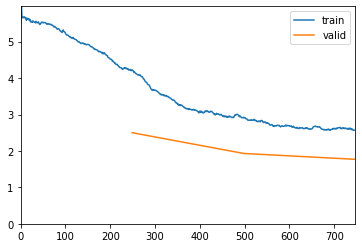

Better model found at epoch 1 with f1_score value: 0.5124539338504449.
Better model found at epoch 2 with f1_score value: 0.5404619796155367.


epoch,train_loss,valid_loss,accuracy,f1_score,time
0,2.022543,1.488894,0.630000,0.625368,01:28
1,1.951075,1.463946,0.630000,0.624516,01:53
2,1.797421,1.407293,0.629000,0.632370,01:35
3,1.757902,1.342195,0.650000,0.645932,01:31
4,1.740433,1.374639,0.648000,0.647567,01:33
5,1.749118,1.421226,0.624000,0.624800,01:39
6,1.630073,1.354084,0.664000,0.662080,01:37
7,1.614535,1.340222,0.655000,0.649428,01:40
8,1.614879,1.340658,0.669000,0.666187,01:41
9,1.474895,1.294484,0.666000,0.667120,01:36


Better model found at epoch 0 with f1_score value: 0.6253676778304722.


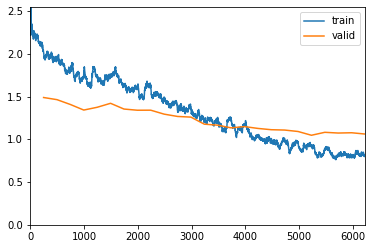

Better model found at epoch 2 with f1_score value: 0.632370410011054.
Better model found at epoch 3 with f1_score value: 0.645931773990152.
Better model found at epoch 4 with f1_score value: 0.6475674137327365.
Better model found at epoch 6 with f1_score value: 0.6620797341565031.
Better model found at epoch 8 with f1_score value: 0.6661871087405413.
Better model found at epoch 9 with f1_score value: 0.6671201054566883.
Better model found at epoch 11 with f1_score value: 0.6802078871663825.
Better model found at epoch 12 with f1_score value: 0.6941429223887929.
Better model found at epoch 13 with f1_score value: 0.6959736602676776.
Better model found at epoch 14 with f1_score value: 0.7059692137026207.
Better model found at epoch 16 with f1_score value: 0.7133807935526083.
Better model found at epoch 18 with f1_score value: 0.7186949661165003.
Better model found at epoch 19 with f1_score value: 0.7247912680579236.
Better model found at epoch 20 with f1_score value: 0.7354270203457668.


                                     precision    recall  f1-score   support

         00.Haleakala_National_Park       0.74      0.70      0.72        20
     01.Mount_Rainier_National_Park       0.53      0.45      0.49        20
                02.Ljubljana_Castle       0.58      0.75      0.65        20
                        03.Dead_Sea       0.56      0.45      0.50        20
                04.Wroclaws_Dwarves       0.89      0.85      0.87        20
          05.London_Olympic_Stadium       0.73      0.80      0.76        20
                   06.Niagara_Falls       0.71      0.60      0.65        20
                      07.Stonehenge       0.81      0.85      0.83        20
                    08.Grand_Canyon       0.79      0.75      0.77        20
              09.Golden_Gate_Bridge       0.84      0.80      0.82        20
                10.Edinburgh_Castle       0.93      0.70      0.80        20
11.Mount_Rushmore_National_Memorial       1.00      0.65      0.79        2

                                                           confused
0                (13.Yellowstone_National_Park, 41.Machu_Picchu, 4)
1                  (15.Central_Park, 27.Seattle_Japanese_Garden, 4)
2                (01.Mount_Rainier_National_Park, 20.Matterhorn, 3)
3   (01.Mount_Rainier_National_Park, 27.Seattle_Japanese_Garden, 3)
4                   (03.Dead_Sea, 42.Death_Valley_National_Park, 3)
5                             (23.Externsteine, 15.Central_Park, 3)
6    (42.Death_Valley_National_Park, 00.Haleakala_National_Park, 3)
7                        (45.Temple_of_Heaven, 17.Changdeokgung, 3)
8    (00.Haleakala_National_Park, 42.Death_Valley_National_Park, 2)
9       (01.Mount_Rainier_National_Park, 25.Banff_National_Park, 2)
10                  (08.Grand_Canyon, 36.Badlands_National_Park, 2)
11                        (10.Edinburgh_Castle, 48.Whitby_Abbey, 2)
12      (11.Mount_Rushmore_National_Memorial, 22.Moscow_Raceway, 2)
13                       (12.Kantanagar_Temple, 

In [6]:
%%time
dls, learner = train_fastai(epochs=25, freeze=3, model=squeezenet1_0)

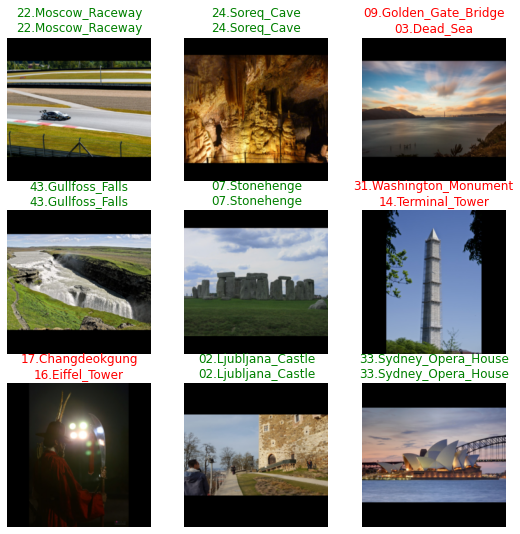

In [7]:
learner.show_results()

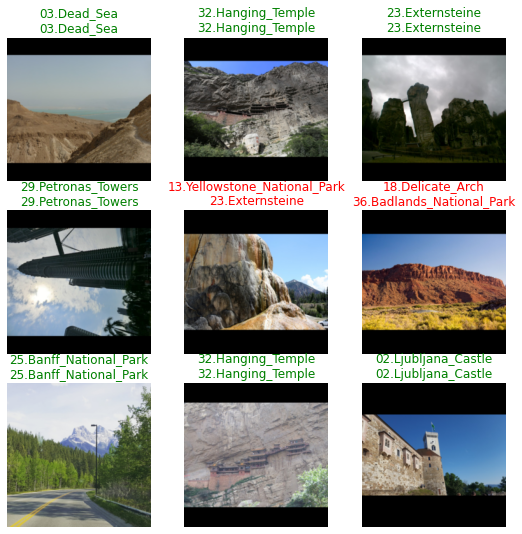

In [8]:
learner.show_results()

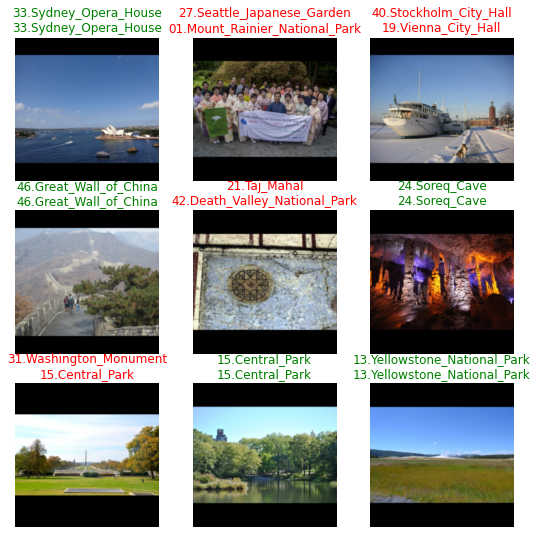

In [9]:
learner.show_results()